In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
np.random.seed(0)


Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [4]:

assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

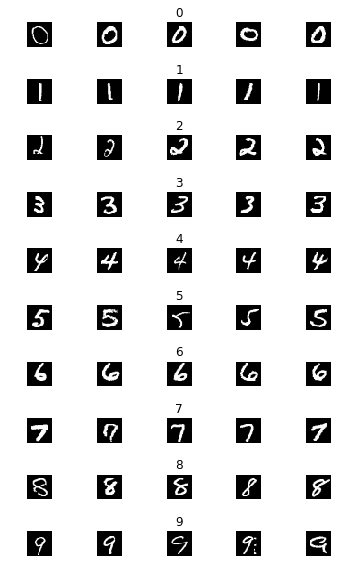

In [5]:
num_of_samples = []
cols=5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train ==j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number')

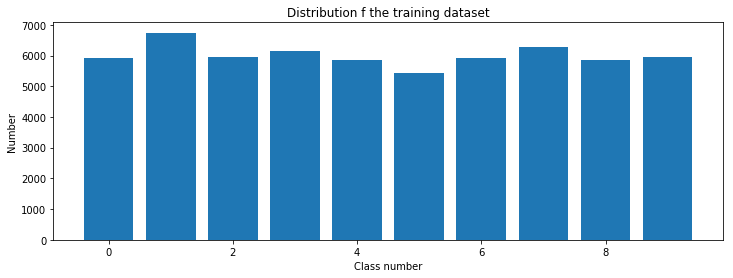

In [6]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title('Distribution f the training dataset')
plt.xlabel("Class number")
plt.ylabel("Number")

In [7]:
# apply one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
#Normalisation of data
X_train = X_train/255
X_test = X_test/255
#flatten input
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)

(60000, 784)


In [9]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim= num_pixels, activation = 'relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
model = create_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose =1, shuffle = 1)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 28us/step - loss: 0.6371 - acc: 0.8043 - val_loss: 0.3037 - val_acc: 0.9108
Epoch 2/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.3759 - acc: 0.8920 - val_loss: 0.2701 - val_acc: 0.9225
Epoch 3/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.3284 - acc: 0.9035 - val_loss: 0.2646 - val_acc: 0.9187
Epoch 4/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.3119 - acc: 0.9078 - val_loss: 0.2571 - val_acc: 0.9240
Epoch 5/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.2948 - acc: 0.9130 - val_loss: 0.2482 - val_acc: 0.9257
Epoch 6/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.2858 - acc: 0.9146 - val_loss: 0.2403 - val_acc: 0.9273
Epoch 7/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.

Text(0.5, 0, 'epochs')

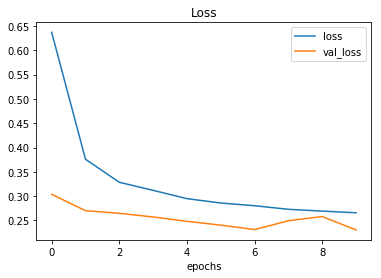

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

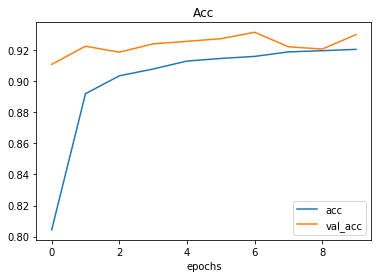

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Acc')
plt.xlabel('epochs')

In [14]:
score = model.evaluate(X_test, y_test, verbose= 1)
print('Test score', score[0])
print('Test accuracy', score[1])

10000/10000 [==============================] - 0s 27us/step
Test score 0.2887020824208856
Test accuracy 0.9163
